In [28]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['scatter']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Importing and Merging Data

In [58]:
guns_death_andOwnership = pd.read_csv("https://raw.githubusercontent.com/fedhere/PUI2017_fb55/master/HW5_fb55/\
World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")

In [59]:
mass_shootings = pd.read_csv("data-pvLFI.csv")

In [60]:
population_gdp = pd.read_excel("population_gdp_world.xlsx")

In [61]:
guns_death_andOwnership = guns_death_andOwnership.rename(columns = {"Country/Territory" : "Country"})

In [62]:
df = guns_death_andOwnership

In [63]:
df = df.merge(population_gdp, right_on="Country", left_on="Country")

In [64]:
df = df.merge(mass_shootings, right_on="Country", left_on="Country")

In [65]:
df.head()

,Country,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,population,gdp,Guns/100 inhabitants,Number of mass shootings
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,22728254.0,1.538194e+12,15.0,4
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,8429991.0,4.074516e+11,30.4,1
2,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,34750545.0,1.824289e+12,30.8,4
3,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,5591572.0,3.271489e+11,12.0,0
4,Finland,FI,CTS,19.8,24.0,0.45,4.0,45.3,2400000.0,5413971.0,2.567065e+11,45.3,2


### Exploration

### plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)¶ 

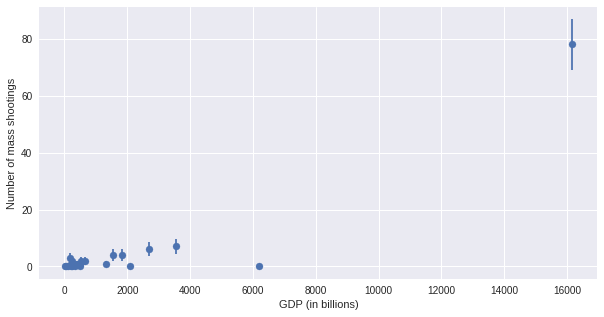

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [67]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of mass shootings'])
ax.errorbar(df.gdp / 1e9, df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")

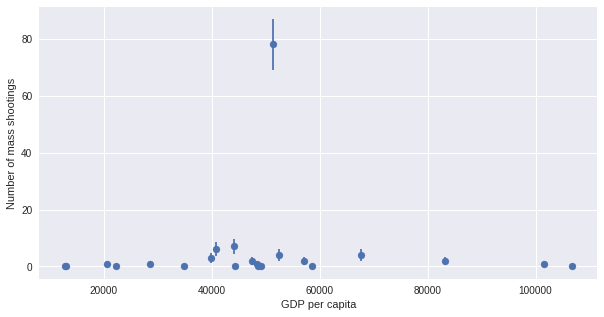

Number of mass shooting vs GDP per capita, errors represent Poisson statistics.
The datapoint at top in center is the US which has a middling GDP per capita but the highest number of mass          shootings.


In [69]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / (df.population), df['Number of mass shootings'])
ax.errorbar(df.gdp / (df.population), df['Number of mass shootings'], 
            yerr = np.sqrt(df['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP per capita")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP per capita, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint at top in center is the US which has a middling GDP per capita but the highest number of mass\
          shootings.")


### plot the average number of civilian fire arms per person

**first without errors, then with errors. are there points that look like outliers?**


In [70]:
#df['shootingspp'] = df["Number of mass shootings"] / df['population'] * 1e3

Text(0.5,0,'Guns per 100 inhabitants')

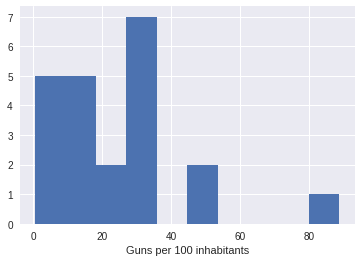

In [71]:
fig, ax = plt.subplots()
ax.hist(df["Guns/100 inhabitants"])
ax.set_xlabel('Guns per 100 inhabitants')

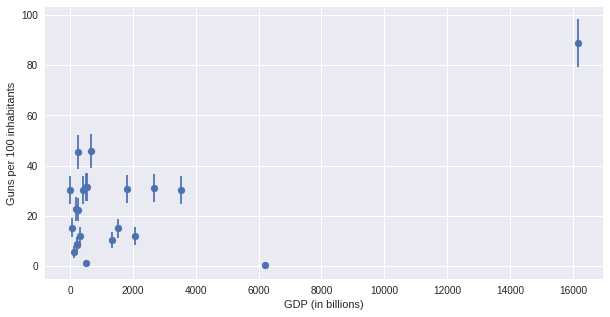

Number of guns per inhabitant vs GDP, errors represent Poisson statistics. The US at top right is a significant outlier.


In [72]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Guns/100 inhabitants'])
ax.errorbar(df.gdp / 1e9, df['Guns/100 inhabitants'], 
            yerr = np.sqrt(df['Guns/100 inhabitants'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Guns per 100 inhabitants")
ax.set_ylim()
pl.show()
print ("Number of guns per inhabitant vs GDP, " + 
       "errors represent Poisson statistics. The US at top right is a significant outlier.")

### plot the average number of homicide by fire arms per person

**first as a histogram**

**then against the country GDP, with statistical errors. are there points that look like outliers?**


Text(0.5,0,'homicides by firearm per 1000 people')

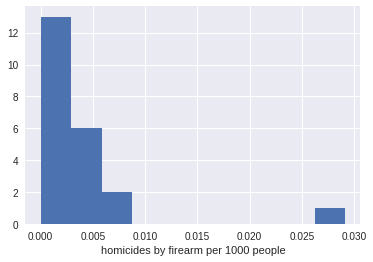

In [73]:
fig, ax = plt.subplots()
ax.hist(df['Number of homicides by firearm'] / df.population * 1000)
ax.set_xlabel('homicides by firearm per 1000 people')

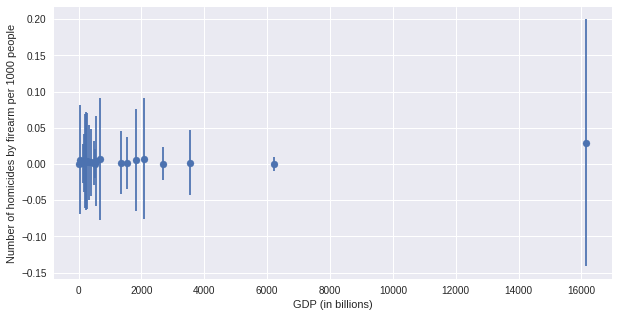

The US at "top" right is a significant outlier (the homicides are significantly higher than other values but because  they are somewhat small it is hard to tell.)


In [75]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df.gdp / 1e9, df['Number of homicides by firearm'] / df.population * 1000)
ax.errorbar(df.gdp / 1e9, df['Number of homicides by firearm'] / df.population * 1000, 
            yerr = np.sqrt(df['Number of homicides by firearm'] / df.population * 1000), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of homicides by firearm per 1000 people")
ax.set_ylim()
pl.show()
print('The US at "top" right is a significant outlier (the homicides are significantly higher than other values\
 but because  they are somewhat small it is hard to tell.)')

### plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

**with and without errorbars**


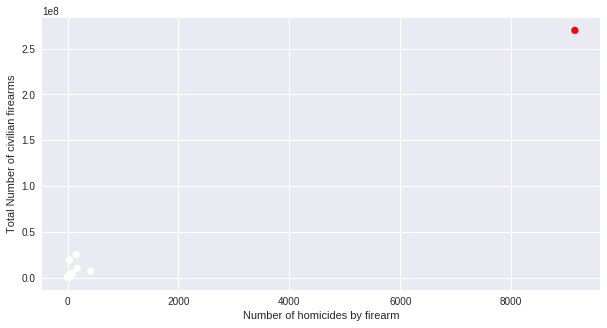

Once again, the US is a significant outlier at the top right.


In [76]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]
for i in range(0,len(df)):
    if df.Country[i] == "United States":
        col.append('r')  
    else:
        col.append('w') 



scatter = ax.scatter(df['Number of homicides by firearm'] , df["Average total all civilian firearms"], color = col)
#ax.errorbar(df['Number of homicides by firearm'] , df["Average total all civilian firearms"], 
 #           yerr = np.sqrt(df["Average total all civilian firearms"] * 1.0), fmt = '.')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Total Number of civilian firearms")
ax.set_ylim()
pl.show()
print("Once again, the US is a significant outlier at the top right.")

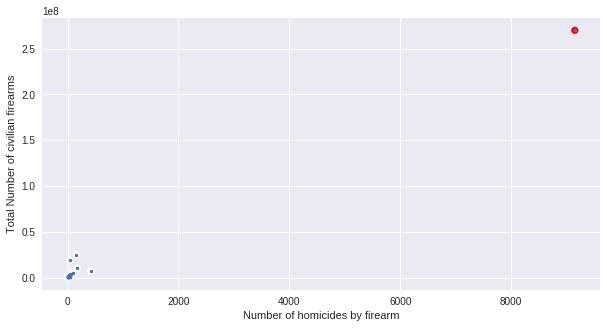

Once again, the US is a significant outlier at the top right. The error bars are quite small, smaller in fact than the points themselves. They are contained within the points, and appear to be very small blue dots.


In [78]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]
for i in range(0,len(df)):
    if df.Country[i] == "United States":
        col.append('r')  
    else:
        col.append('w') 



scatter = ax.scatter(df['Number of homicides by firearm'] , df["Average total all civilian firearms"], color = col)
ax.errorbar(df['Number of homicides by firearm'] , df["Average total all civilian firearms"], 
            yerr = np.sqrt(df["Average total all civilian firearms"] * 1), fmt = '.')
ax.set_xlabel("Number of homicides by firearm")
ax.set_ylabel("Total Number of civilian firearms")
ax.set_ylim()
pl.show()
print("Once again, the US is a significant outlier at the top right. The error bars are quite small, \
smaller in fact than the points themselves. They are contained within the points, and appear to be very small blue\
 dots.")

### plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

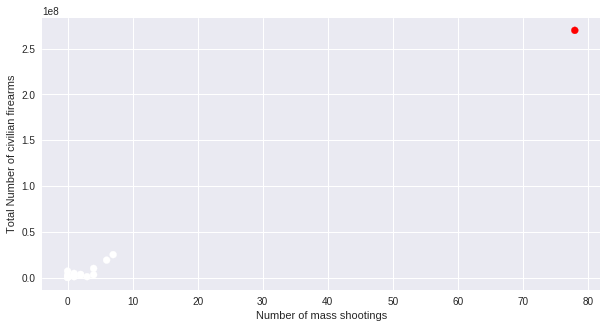

Once again, the US is a significant outlier at the top right.


In [79]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]
for i in range(0,len(df)):
    if df.Country[i] == "United States":
        col.append('r')  
    else:
        col.append('w') 



scatter = ax.scatter(df['Number of mass shootings'] , df["Average total all civilian firearms"], color = col)
#ax.errorbar(df['Number of mass shootings'] , df["Average total all civilian firearms"], 
 #           yerr = np.sqrt(df["Average total all civilian firearms"] * 1.0), fmt = '.')
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Total Number of civilian firearms")
ax.set_ylim()
pl.show()
print("Once again, the US is a significant outlier at the top right.")

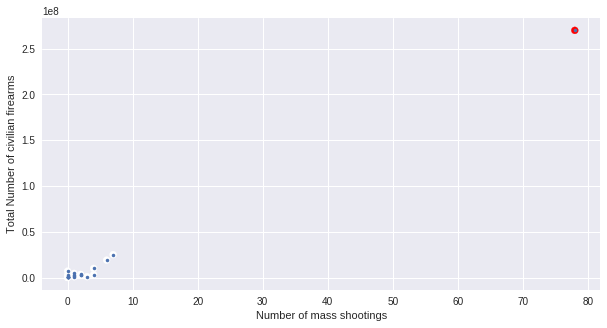

Once again, the US is a significant outlier at the top right. The error bars are quite small, smaller in fact than the points themselves. They are contained within the points, and appear as very small bluedots.


In [80]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

col=[]
for i in range(0,len(df)):
    if df.Country[i] == "United States":
        col.append('r')  
    else:
        col.append('w') 



scatter = ax.scatter(df['Number of mass shootings'] , df["Average total all civilian firearms"], color = col)
ax.errorbar(df['Number of mass shootings'] , df["Average total all civilian firearms"], 
            yerr = np.sqrt(df["Average total all civilian firearms"] * 1.0), fmt = '.')
ax.set_xlabel("Number of mass shootings")
ax.set_ylabel("Total Number of civilian firearms")
ax.set_ylim()
pl.show()

print("Once again, the US is a significant outlier at the top right. The error bars are quite small, \
smaller in fact than the points themselves. They are contained within the points, and appear as very small blue\
dots.")

### Modeling
#### fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

- statsmodels OLS
- statsmodels WLS
- seaborn
- choose one of
    -- creating a function that calculates the residuals and minimizing that function
    -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
    -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html


WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors: weights = 1.0/df.yerror Notice that a - sqrt(0) = 0 b - 1/0 = infinity c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.

the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function to plot the regression confidence intervals.

import seaborn as sns sns.regplot(x="x", y="y", data=df);


In [81]:
df["Firearms per person"] = df["Average total all civilian firearms"]/df.population
df["Mass shootings per 1mill people"] = 1000000*df["Number of mass shootings"]/df.population
df["y"] = df["Mass shootings per 1mill people"]
df['x'] = df["Firearms per person"]

In [82]:
lm = smf.ols(formula='y ~ x', data = df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     4.971
Date:                Tue, 17 Oct 2017   Prob (F-statistic):             0.0374
Time:                        14:02:28   Log-Likelihood:                 11.424
No. Observations:                  22   AIC:                            -18.85
Df Residuals:                      20   BIC:                            -16.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0315      0.051      0.612      0.548        -0.076     0.139
x              0.3911      0.175      2.230      0.037         0.025     0.757
==============================================================================
Omnibus:                       34.840   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.018
Skew:                           2.733   Prob(JB):                     7.71e-20
Kurtosis:                      11.133   Cond. No.                         5.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The low R2 and moderate slopes suggest a positive relationship between mass shootings and firearms ownership, but perhaps not one that is statistically significant.


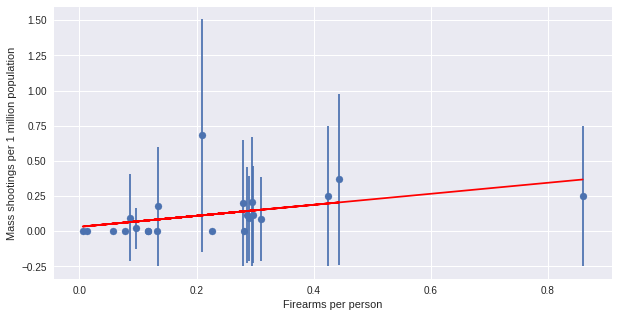

In [85]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df.x,df.y)
ax.plot(df.x,lm.predict(),'r-')
ax.set_xlabel('Firearms per person')
ax.set_ylabel('Mass shootings per 1 million population')

ax.errorbar(df.x , df.y, 
            yerr = np.sqrt(df.y * 1.0), fmt = '.')

print("The low R2 and moderate slopes suggest a positive relationship between mass shootings and firearms ownership, \
but perhaps not one that is statistically significant.")

In [86]:
wls = statsmodels.regression.linear_model.WLS(df.y, df.x, weights=abs(1/lm.resid)).fit()

In [87]:
wls.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            WLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     52.61
Date:                Tue, 17 Oct 2017   Prob (F-statistic):           3.82e-07
Time:                        14:03:16   Log-Likelihood:                 25.229
No. Observations:                  22   AIC:                            -48.46
Df Residuals:                      21   BIC:                            -47.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x              0.4351      0.060      7.253      0.000         0.310     0.560
==============================================================================
Omnibus:                        3.868   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                2.837
Skew:                           0.879   Prob(JB):                        0.242
Kurtosis:                       2.928   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The high R2 and p value of zero suggests that a statistically significant and positive relationship between mass shootings and firearms per person.


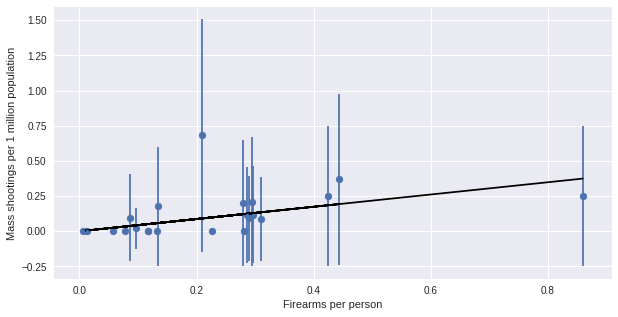

In [88]:
output = wls.params[0]

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df.x,df.y)
ax.plot(df.x, df.x * output,'k-')
ax.set_xlabel('Firearms per person')
ax.set_ylabel('Mass shootings per 1 million population')

ax.errorbar(df.x , df.y, 
            yerr = np.sqrt(df.y * 1.0), fmt = '.')

print("The high R2 and p value of zero suggests that a statistically significant and positive relationship between \
mass shootings and firearms per person.")

This plot shows the same as the previous two - some variation does exist but the relationship is always positive.


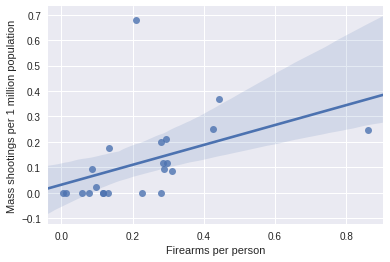

In [90]:
sns.regplot(x="x", y="y", data=df)

pl.xlabel('Firearms per person')
pl.ylabel('Mass shootings per 1 million population')

print("This plot shows the same as the previous two - some variation does exist but the relationship is always \
positive.")

This model also shows a positive relationship between shootings and firearms ownership.


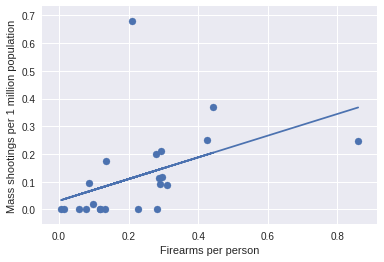

In [92]:
beta1_np, beta0_np = np.polyfit(df.x, df.y, 1)

plt.scatter(df.x,df.y)

pl.plot(df.x, df.x * beta1_np + beta0_np, '-')

pl.xlabel('Firearms per person')
pl.ylabel('Mass shootings per 1 million population')

print("This model also shows a positive relationship between shootings and firearms ownership.")

### Use the stsatsmodels.graphics package to plot the influence plot.¶ 

In [93]:
import statsmodels.graphics.regressionplots

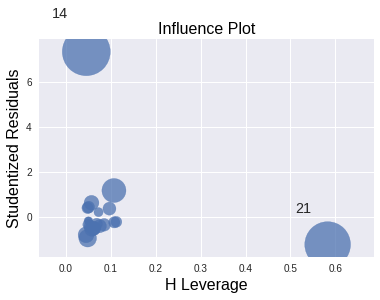

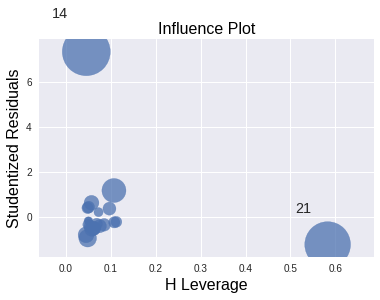

In [94]:
statsmodels.graphics.regressionplots.influence_plot(lm, alpha = .05, criterion="cooks")

In [101]:
print(df.iloc[14]["Country"], df.iloc[21]["Country"])

New Zealand United States


New Zealand is the country with the highest residuals. This is because it has the highest number of mass shootings per million residents. It has influence because it is far from the mean for shootings per million, but not as much as the US. The United States has the highest leverage, or influence. This is because it is an outlier value, one very far from the mean of both mass shootings per million and firearms per person.